In [15]:
# Dependencies
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
from config import yelp_api_key

In [16]:
#to get the different categories from categories.json in Resources

restaurant_categories = []

with open('Resources/categories.json') as json_file:
    cats = json.load(json_file)
    
    for category in cats:
        try:
            if category['parents'][0]=='restaurants':
                restaurant_categories.append(category['alias'])
            
        except Exception as e:
            #print(f'Restaurant not found. Skipping...')
            pass  # no operation


print(restaurant_categories)

['afghani', 'african', 'andalusian', 'arabian', 'argentine', 'armenian', 'asianfusion', 'asturian', 'australian', 'austrian', 'baguettes', 'bangladeshi', 'basque', 'bavarian', 'bbq', 'beergarden', 'beerhall', 'beisl', 'belgian', 'bistros', 'blacksea', 'brasseries', 'brazilian', 'breakfast_brunch', 'british', 'buffets', 'bulgarian', 'burgers', 'burmese', 'cafes', 'cafeteria', 'cajun', 'cambodian', 'canteen', 'caribbean', 'catalan', 'cheesesteaks', 'chicken_wings', 'chickenshop', 'chilean', 'chinese', 'comfortfood', 'corsican', 'creperies', 'cuban', 'currysausage', 'cypriot', 'czech', 'czechslovakian', 'danish', 'delis', 'diners', 'dinnertheater', 'dumplings', 'eastern_european', 'eltern_cafes', 'ethiopian', 'filipino', 'fischbroetchen', 'fishnchips', 'flatbread', 'fondue', 'food_court', 'foodstands', 'freiduria', 'french', 'galician', 'gamemeat', 'gastropubs', 'georgian', 'german', 'giblets', 'gluten_free', 'greek', 'guamanian', 'halal', 'hawaiian', 'heuriger', 'himalayan', 'hkcafe', 'h

In [17]:
query_criteria = "oceanside,ca"
#latitude = 32.77258
#longitude = -117.0719

#change fetch_data to true if you want to fetch the data again
fetch_data = False

#to fetch data once and store in folder
if fetch_data == True:
    for category in restaurant_categories:
        
        try:     
                #url = f"https://api.yelp.com/v3/businesses/search?term=restaurants&latitude={latitude}&longitude={longitude}&radius=5000&limit=50&categories={category}"
                
                url = f"https://api.yelp.com/v3/businesses/search?term=restaurants&location={query_criteria}&radius=5000&limit=50&categories={category}"
                
                r = requests.get(url, headers={"Authorization":"Bearer " + yelp_api_key})
                restaurants_category_json = r.json()
                
                #if restaurants_category_json['total'] > 0 
                    #dump json to query criteria folder using category as filename
                with open(f'Resources/oceanside/{category}.json', 'w') as outfile:
                    json.dump(restaurants_category_json, outfile)
                
        except Exception as e:
            print(e)

In [18]:
name = []
category = []
rating = []
review_count = []
price = []

#to get the data downloaded from yelp which were stored in local folder (*)means all file
files = glob.glob(f'Resources/oceanside/*.json')

#to go through each json file and grab data to populate the lists/series on top
for filename in files:
    #print(filename)
    with open(filename) as json_file:
        restaurants_json = json.load(json_file)
        for restaurant in restaurants_json['businesses']:
            try:
                name.append(restaurant['name'])
                
                base=os.path.basename(filename)#need to drop parts of string to keep category name
                categoryName = os.path.splitext(base)[0]
                category.append(categoryName) 
                
                review_count.append(restaurant['review_count'])
                rating.append(restaurant['rating'])
                
                #if restaurant does not have a restaurant['price'] value, provide a value (but how?) 
                price.append(restaurant['price'])

            except Exception as e:
                #print(f'Restaurant not found. Skipping...')
                pass  # no operation

print(len(name))
print(len(category))
print(len(review_count))
print(len(rating))
print(len(price))

389
389
389
389
355


In [19]:
restaurants_oceanside_dict = {
    "Name": name,
    "Category": category,
    "Rating": rating,
    "Review Count": review_count
}
restaurants_oceanside_df = pd.DataFrame(restaurants_oceanside_dict)
restaurants_oceanside_df.head()

,Name,Category,Rating,Review Count
0,Chin's Szechwan Cuisine - Oceanside,asianfusion,4.0,257
1,WaBa Grill,asianfusion,3.5,201
2,Poki Poki - Oceanside#2,asianfusion,4.0,47
3,Pick Up Stix,asianfusion,2.5,75
4,Felix's BBQ With Soul,bbq,4.5,1454


In [20]:
restaurant_count = restaurants_oceanside_df.groupby(category)['Review Count'].agg(['count','sum'])
restaurant_count_category_df = pd.DataFrame({
    "Restaurant Count Per Category": restaurant_count["count"],
    "Review Count Per Category" : restaurant_count['sum'],
    "Average Reviews Per Restaurant" : restaurant_count['sum']/restaurant_count["count"]

}
)
restaurant_count_category_df.head()

,Restaurant Count Per Category,Review Count Per Category,Average Reviews Per Restaurant
asianfusion,4,580,145.000000
bbq,13,3634,279.538462
breakfast_brunch,11,2006,182.363636
buffets,3,326,108.666667
burgers,30,3580,119.333333


Text(0.5,-27.75,'Restaurant Category')

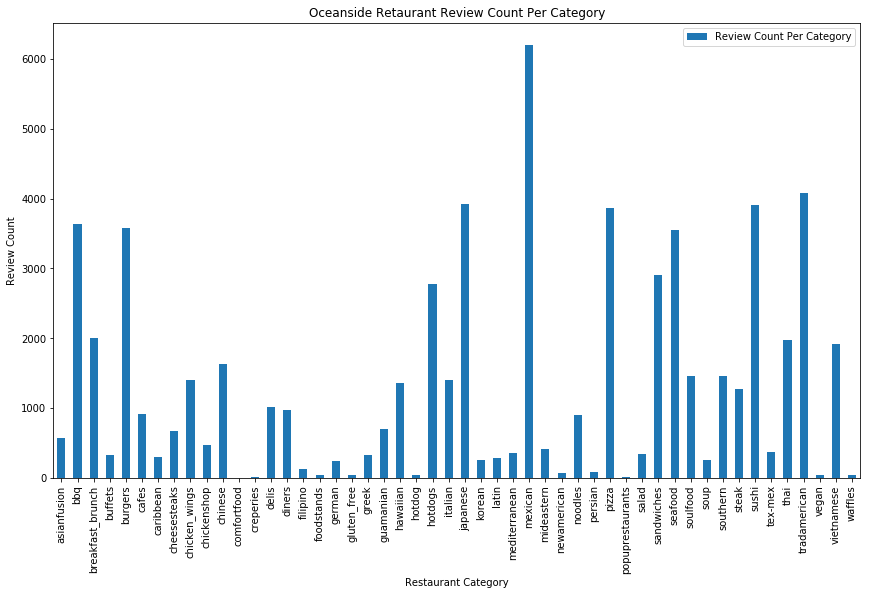

In [21]:
restaurant_count = restaurants_oceanside_df.groupby(category)['Review Count'].agg(['count','sum'])
restaurant_count_category_df = pd.DataFrame({
    "Review Count Per Category" : restaurant_count['sum']
}
)
restaurant_count_category_df
restaurant_count_category_df.plot(kind='bar',figsize=(12,8))
plt.tight_layout()
plt.title("Oceanside Retaurant Review Count Per Category")
plt.ylabel("Review Count")
plt.xlabel("Restaurant Category")

                  Avereage Review Per Category
asianfusion                         145.000000
bbq                                 279.538462
breakfast_brunch                    182.363636
buffets                             108.666667
burgers                             119.333333
cafes                               457.000000
caribbean                           308.000000
cheesesteaks                        334.500000
chicken_wings                       128.181818
chickenshop                         159.333333
chinese                             125.615385
comfortfood                           4.000000
creperies                            11.000000
delis                               101.900000
diners                              242.500000
filipino                            123.000000
foodstands                           12.000000
german                              239.000000
gluten_free                          44.000000
greek                               328.000000
guamanian    

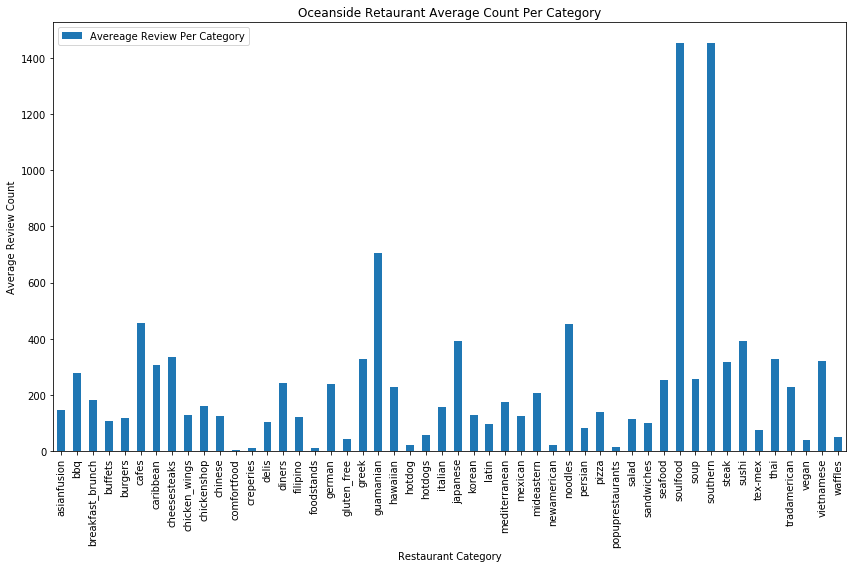

In [22]:
restaurant_mean = restaurants_oceanside_df.groupby(category)['Review Count'].agg(['count','sum','mean'])
restaurant_mean_category_df = pd.DataFrame({
    "Avereage Review Per Category" : restaurant_mean['mean']
}
)
print(restaurant_mean_category_df)
restaurant_mean_category_df.plot(kind='bar',figsize=(12,8))
plt.title("Oceanside Retaurant Average Count Per Category")
plt.ylabel("Average Review Count")
plt.xlabel("Restaurant Category")
plt.tight_layout()
plt.show()

In [23]:
#Group by rating
restaurant_mean = restaurants_oceanside_df.groupby(category)['Rating'].agg(['count','sum','mean'])
restaurant_mean_category_df = pd.DataFrame({
       "Average Rating Per Category" : restaurant_mean['sum']/restaurant_mean["count"]
}
)
restaurant_mean_category_df.head()

,Average Rating Per Category
asianfusion,3.500000
bbq,4.269231
breakfast_brunch,3.409091
buffets,3.166667
burgers,3.033333


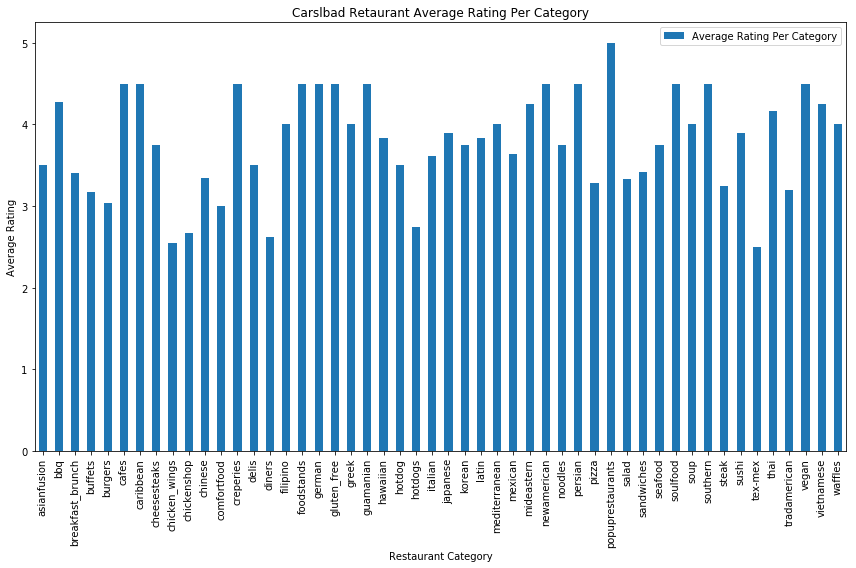

In [24]:
restaurant_mean_category_df.plot(kind='bar',figsize=(12,8))
plt.title("Carslbad Retaurant Average Rating Per Category")
plt.ylabel("Average Rating")
plt.xlabel("Restaurant Category")
plt.tight_layout()
plt.show()